In [3]:
#Vamos a importar las librerías que vamos a utilizar.

import pandas as pd                #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos.
from google.colab import files

In [ ]:
#Cargamos el archivo data.csv
files.upload()

In [5]:
# Vamos a leer el conjunto de datos en un dataframe de pandas.
df = pd.read_csv('/content/data.csv')

In [6]:
# Revisemos las primeras filas del dataframe.
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
#Vamos a realizar una exploración inicial del conjunto de datos.
print('(Número de observaciones, número de atributos) = {}\n'.format(df.shape))

(Número de observaciones, número de atributos) = (7043, 21)



In [ ]:
print('¿El conjunto de datos tiene nan?',df.isnull().values.any(),'\n')
print('¿Cuántos nan tiene en total?', df.isnull().sum().sum(),'\n')
#En cuáles de los atributos tenemos valores nan?
diccionario_de_nan = {}
for atributo in df.columns.values:
  diccionario_de_nan[atributo]=df[atributo].isnull().sum()
print('¿Cómo están distribuidos los nan?\n',diccionario_de_nan)

¿El conjunto de datos tiene nan? False 

¿Cuántos nan tiene en total? 0 

¿Cómo están distribuidos los nan?
 {'customerID': 0, 'gender': 0, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'TotalCharges': 0, 'Churn': 0}


In [ ]:
#Revisemos los atributos del conjunto de datos.
print(df.dtypes,'\n')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object 



In [ ]:
#Debemos cambiar el tipo de dato del atributo: TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
#Revisemos de nuevo los atributos del conjunto de datos.
print(df.dtypes,'\n')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object 



In [ ]:
#Volvamos a revisar si después del cambio del tipo de dato del atributo TotalCharges se presentan NaN
print('¿El conjunto de datos tiene nan?',df.isnull().values.any(),'\n')
print('¿Cuántos nan tiene en total?', df.isnull().sum().sum(),'\n')
#En cuáles de los atributos tenemos valores nan?
diccionario_de_nan = {}
for atributo in df.columns.values:
  diccionario_de_nan[atributo]=df[atributo].isnull().sum()
print('¿Cómo están distribuidos los nan?\n',diccionario_de_nan)

¿El conjunto de datos tiene nan? True 

¿Cuántos nan tiene en total? 11 

¿Cómo están distribuidos los nan?
 {'customerID': 0, 'gender': 0, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'TotalCharges': 11, 'Churn': 0}


In [ ]:
#Encontramos 11 NaN, son pocos y por lo tanto los reemplazamos con la media
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
#Ahora tenemos el dataset limpio de datos nulos para comenzar a explorarlo
print('¿El conjunto de datos tiene nan?',df.isnull().values.any(),'\n')
print('¿Cuántos nan tiene en total?', df.isnull().sum().sum(),'\n')
#En cuáles de los atributos tenemos valores nan?
diccionario_de_nan = {}
for atributo in df.columns.values:
  diccionario_de_nan[atributo]=df[atributo].isnull().sum()
print('¿Cómo están distribuidos los nan?\n',diccionario_de_nan)

¿El conjunto de datos tiene nan? False 

¿Cuántos nan tiene en total? 0 

¿Cómo están distribuidos los nan?
 {'customerID': 0, 'gender': 0, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'TotalCharges': 0, 'Churn': 0}


In [ ]:
#Obtengamos algunas estadísticas de cada atributo para entender mejor el conjunto de datos.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


El método $.describe()$ nos arroja estadisticas sobre las 4 variables continuas del dataset.


*   SeniorCitizen
*   Tenure
*   MonthlyCharges
*   TotalCharges

Sin embargo, observamos las estadisticas y las primeras filas del conjunto de datos, vemos que la variable SeniorCitizen es categorica, ya que solo contiene valores de 1 y 0.

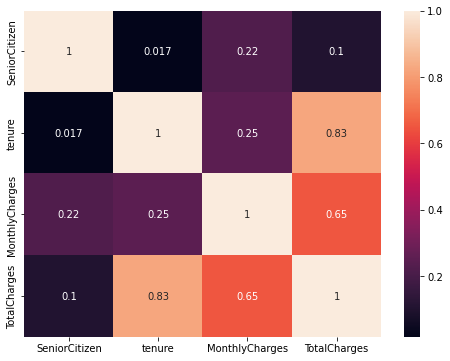

In [ ]:
#Vemos la correlación de los atributos, donde correlación linear positiva (mayor o igual a 0.6) y negativa (menor o igual a -0.5)
import matplotlib.pyplot as plt
import seaborn as sns
corr_df = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

A continuación comenzaremos a explorar el dataframe, identificando sobre todo, como es la distribución de la variable $Churn$ y como es su relación con las demás variables, pues es lo que más nos interesa para posteriormente entrenar los modelos.

In [ ]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

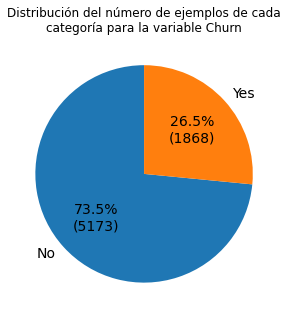

In [ ]:
churn_numeric = {1:'Yes', 0:'No'}
df.Churn.replace(churn_numeric, inplace=True)
conteo_de_ejemplos = df['Churn'].value_counts()
conteo_de_ejemplos.plot(kind='pie', 
                                    figsize=(5, 5),
                                    autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo_de_ejemplos.sum())),
                                    startangle=90,       
                                    fontsize=14)      
titulo = 'Distribución del número de ejemplos de cada\ncategoría para la variable Churn'
plt.title(titulo) 
plt.ylabel('') 
plt.show()

##Variables binarias

Como observamos anteriormente con la variable SeniorCitizen, en el conjunto de datos tenemos variables cuya salida solo tiene dos posibles resultados: 1 : Yes - 0 : No

Procederemos a analizar primero estas variables.

In [ ]:
for colum in df.columns:
    if df[colum].value_counts().shape[0] == 2:
        print(colum)

gender
SeniorCitizen
Partner
Dependents
PhoneService
PaperlessBilling
Churn


Primero debemos observar la distribución de las variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

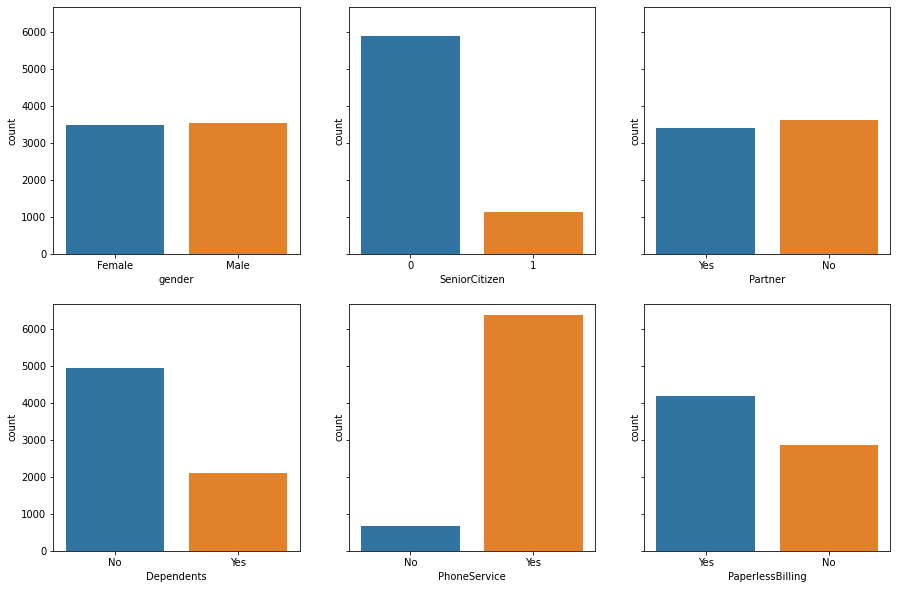

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

Ahora observaremos la relación de cada variables respecto a la variable objetivo $Churn$

Además, exploraremos la relación que tiene cada variable con las cargas mensuales que realiza el usuario.

,Churn
gender,
Female,0.269209
Male,0.261603


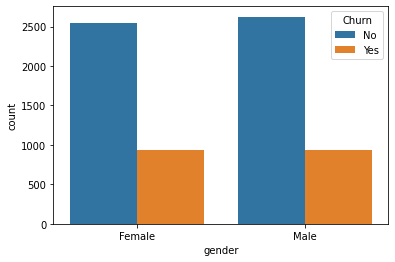

In [ ]:
churn_numeric = {1:'Yes', 0:'No'}
df.Churn.replace(churn_numeric, inplace=True)
sns.countplot(x="gender", hue="Churn", data=df)
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)
df[['gender','Churn']].groupby(['gender']).mean()

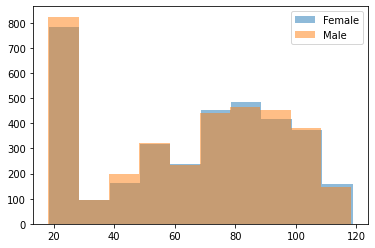

In [ ]:
plt.hist(df[df['gender']=='Female']['MonthlyCharges'],alpha=0.5,label='Female')
plt.hist(df[df['gender']=='Male']['MonthlyCharges'],alpha=0.5,label='Male')
plt.legend()
plt.show()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


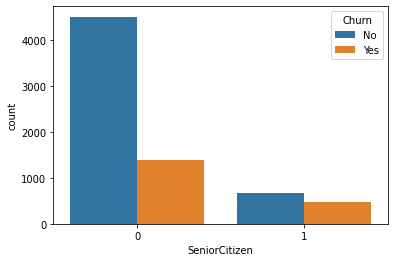

In [ ]:
churn_numeric = {1:'Yes', 0:'No'}
df.Churn.replace(churn_numeric, inplace=True)
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

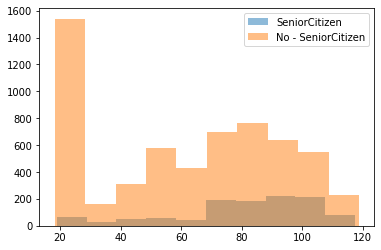

In [ ]:
plt.hist(df[df['SeniorCitizen']==1]['MonthlyCharges'],alpha=0.5,label='SeniorCitizen')
plt.hist(df[df['SeniorCitizen']==0]['MonthlyCharges'],alpha=0.5,label='No - SeniorCitizen')
plt.legend()
plt.show()

,Churn
Partner,
No,0.329580
Yes,0.196649


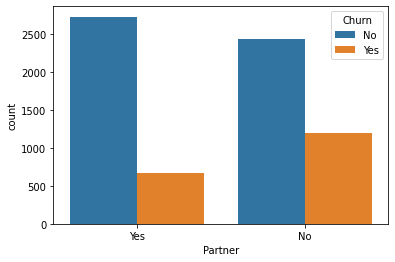

In [ ]:
churn_numeric = {1:'Yes', 0:'No'}
df.Churn.replace(churn_numeric, inplace=True)
sns.countplot(x="Partner", hue="Churn", data=df)
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)
df[['Partner','Churn']].groupby(['Partner']).mean()

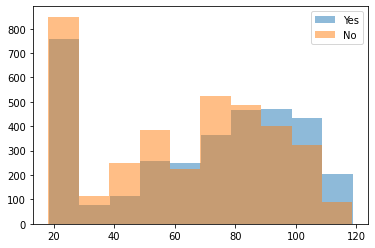

In [ ]:
plt.hist(df[df['Partner']=='Yes']['MonthlyCharges'],alpha=0.5,label='Yes')
plt.hist(df[df['Partner']=='No']['MonthlyCharges'],alpha=0.5,label='No')
plt.legend()
plt.show()

,Churn
Dependents,
No,0.312791
Yes,0.154502


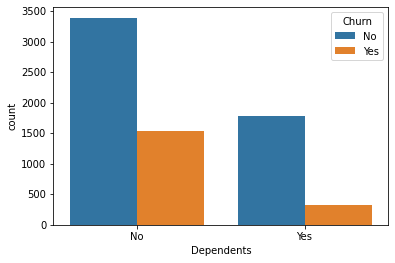

In [ ]:
churn_numeric = {1:'Yes', 0:'No'}
df.Churn.replace(churn_numeric, inplace=True)
sns.countplot(x="Dependents", hue="Churn", data=df)
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)
df[['Dependents','Churn']].groupby(['Dependents']).mean()

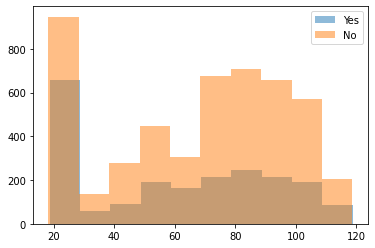

In [ ]:
plt.hist(df[df['Dependents']=='Yes']['MonthlyCharges'],alpha=0.5,label='Yes')
plt.hist(df[df['Dependents']=='No']['MonthlyCharges'],alpha=0.5,label='No')
plt.legend()
plt.show()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


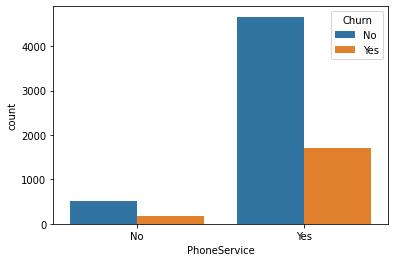

In [ ]:
churn_numeric = {1:'Yes', 0:'No'}
df.Churn.replace(churn_numeric, inplace=True)
sns.countplot(x="PhoneService", hue="Churn", data=df)
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

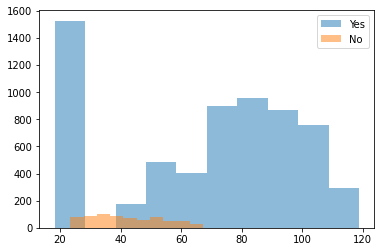

In [ ]:
plt.hist(df[df['PhoneService']=='Yes']['MonthlyCharges'],alpha=0.5,label='Yes')
plt.hist(df[df['PhoneService']=='No']['MonthlyCharges'],alpha=0.5,label='No')
plt.legend()
plt.show()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


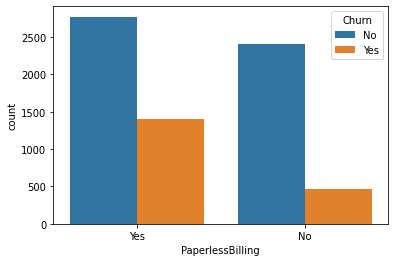

In [ ]:
churn_numeric = {1:'Yes', 0:'No'}
df.Churn.replace(churn_numeric, inplace=True)
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

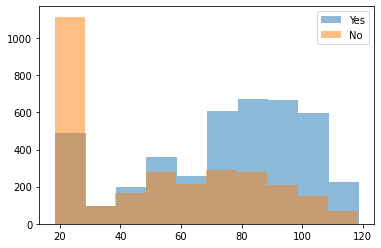

In [ ]:
plt.hist(df[df['PaperlessBilling']=='Yes']['MonthlyCharges'],alpha=0.5,label='Yes')
plt.hist(df[df['PaperlessBilling']=='No']['MonthlyCharges'],alpha=0.5,label='No')
plt.legend()
plt.show()

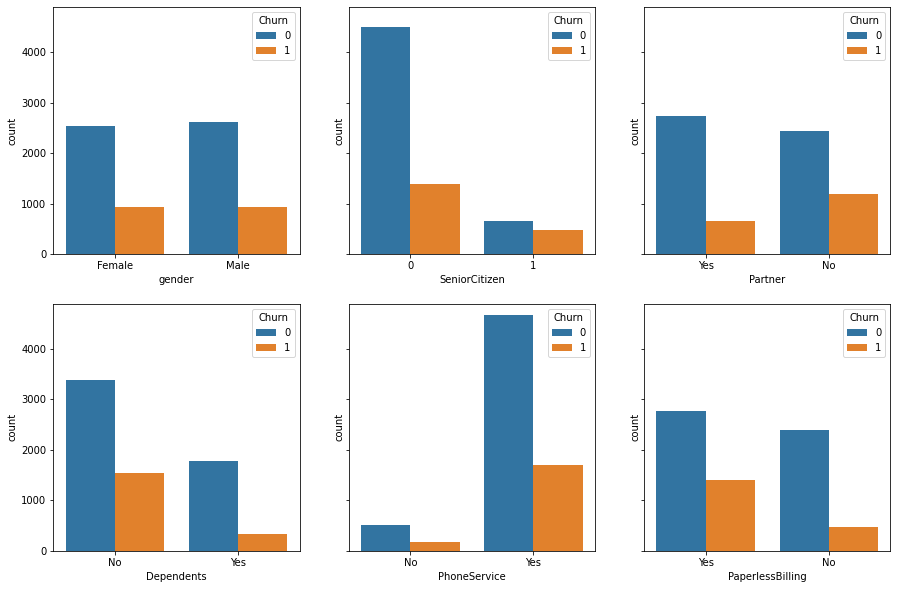

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
sns.countplot(x="gender", hue="Churn",data=df, ax=axes[0,0])
sns.countplot(x="SeniorCitizen",hue="Churn", data=df, ax=axes[0,1])
sns.countplot(x="Partner", hue="Churn",data=df, ax=axes[0,2])
sns.countplot(x="Dependents", hue="Churn",data=df, ax=axes[1,0])
sns.countplot(x="PhoneService", hue="Churn",data=df, ax=axes[1,1])
sns.countplot(x="PaperlessBilling", hue="Churn",data=df, ax=axes[1,2])

##Variables no binarias

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

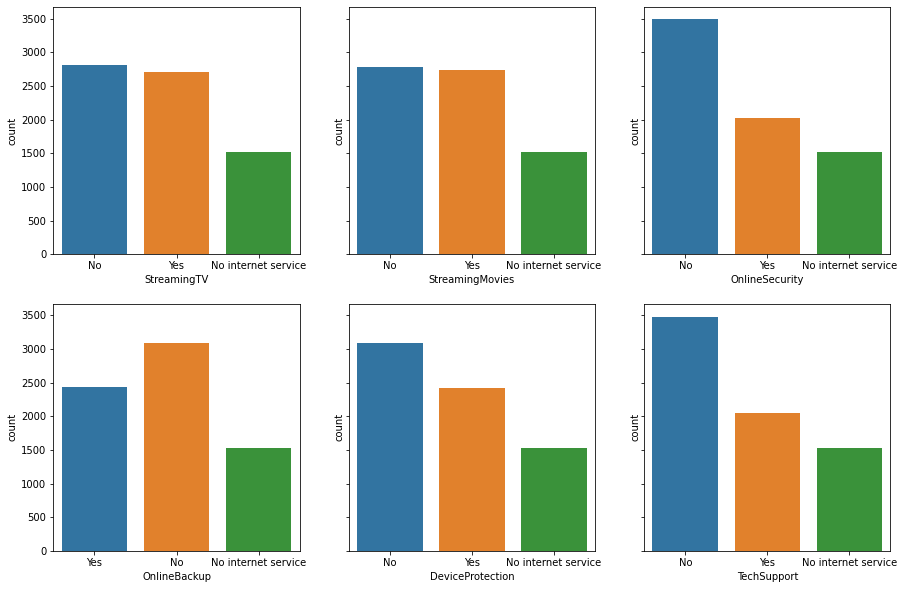

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

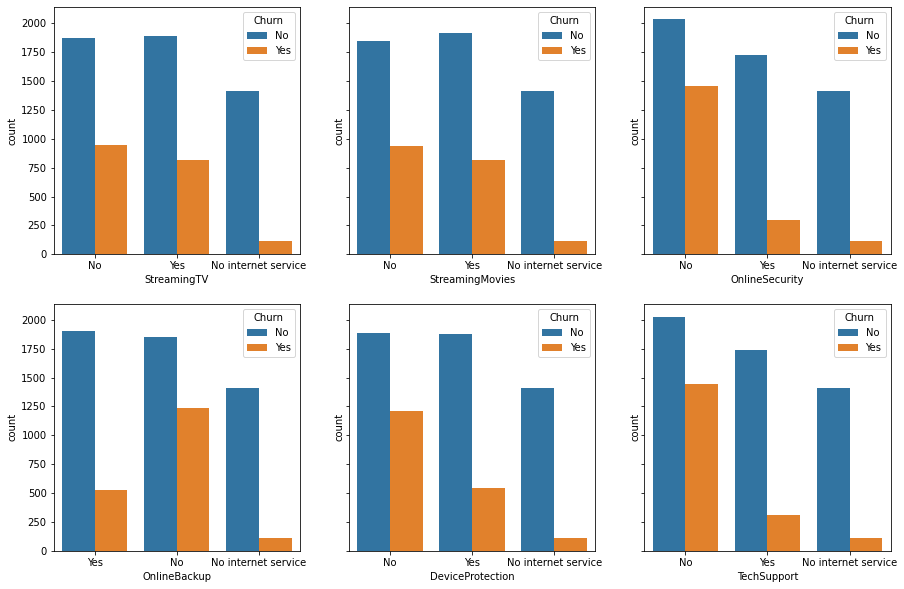

In [ ]:
churn_numeric = {1:'Yes', 0:'No'}
df.Churn.replace(churn_numeric, inplace=True)
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
sns.countplot(x="StreamingTV", hue="Churn",data=df, ax=axes[0,0])
sns.countplot(x="StreamingMovies",hue="Churn", data=df, ax=axes[0,1])
sns.countplot(x="OnlineSecurity",hue="Churn", data=df, ax=axes[0,2])
sns.countplot(x="OnlineBackup", hue="Churn",data=df, ax=axes[1,0])
sns.countplot(x="DeviceProtection",hue="Churn", data=df, ax=axes[1,1])
sns.countplot(x="TechSupport",hue="Churn", data=df, ax=axes[1,2])

In [ ]:
df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
StreamingTV
No
No internet service
Yes


In [ ]:
df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
StreamingMovies
No
No internet service
Yes


In [ ]:
df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
OnlineSecurity
No
No internet service
Yes


In [ ]:
df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
OnlineBackup
No
No internet service
Yes


In [ ]:
df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
DeviceProtection
No
No internet service
Yes


In [ ]:
df[['TechSupport','Churn']].groupby('TechSupport').mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
TechSupport
No
No internet service
Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Contract
Month-to-month
One year
Two year


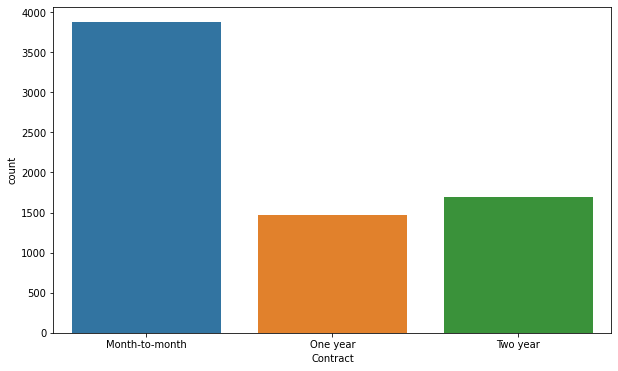

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=df)
df[['Contract','Churn']].groupby('Contract').mean()

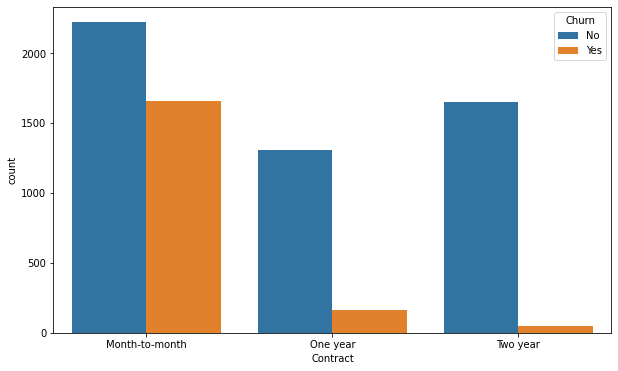

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Contract", hue="Churn",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
PaymentMethod
Bank transfer (automatic)
Credit card (automatic)
Electronic check
Mailed check


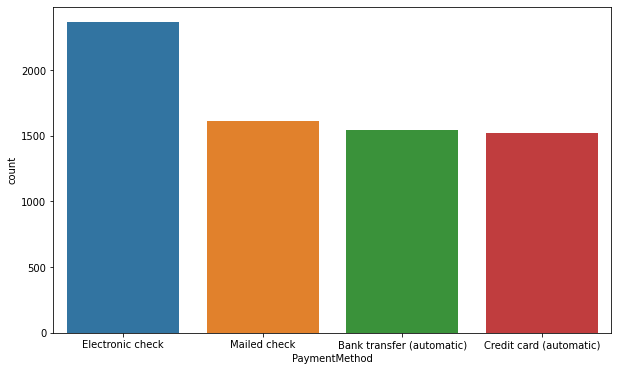

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)
df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

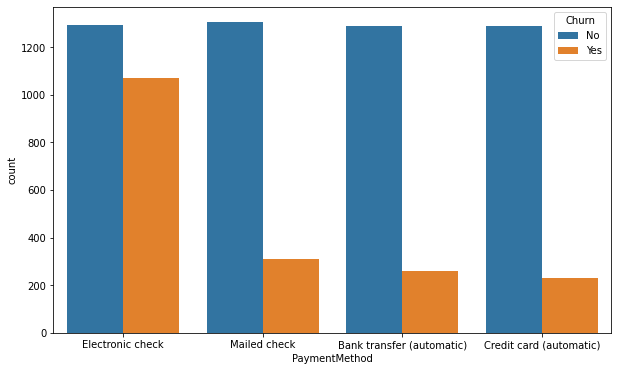

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="PaymentMethod", hue="Churn",data=df)

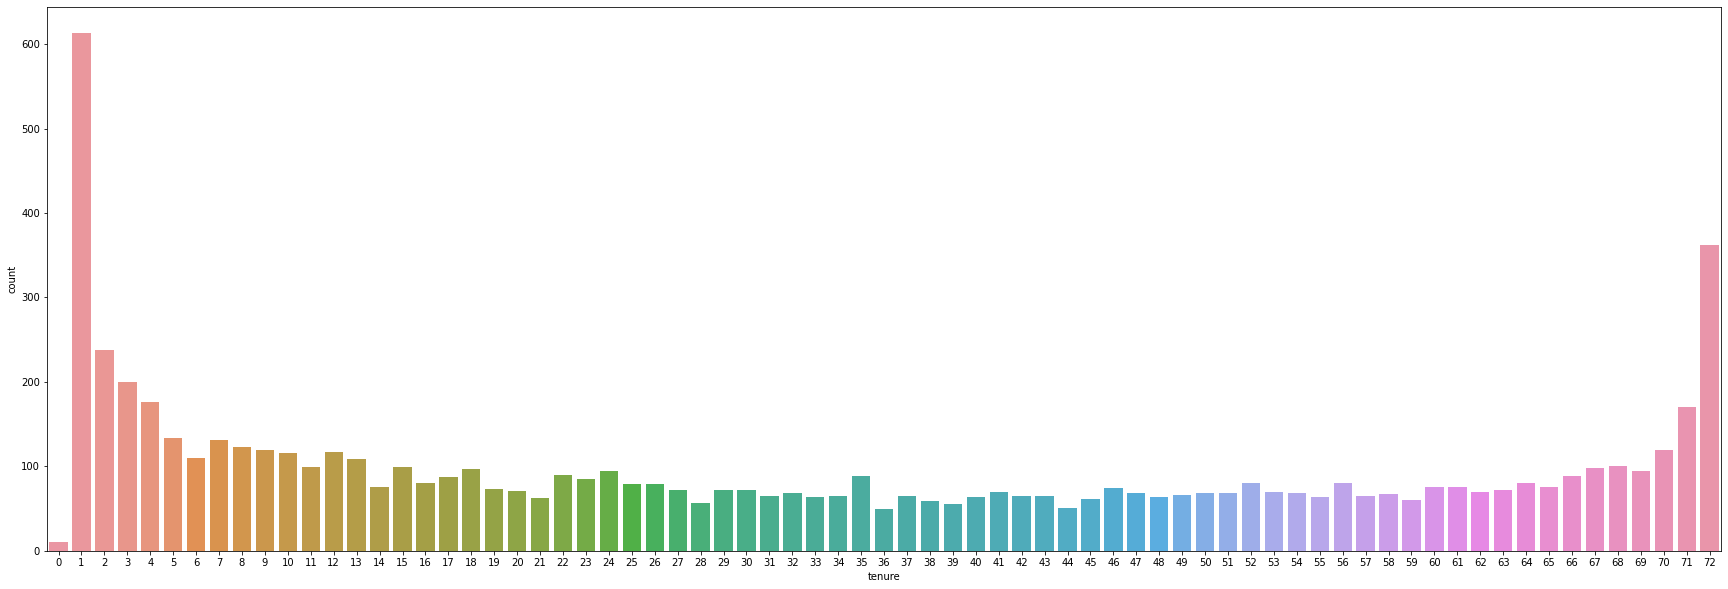

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x="tenure", data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


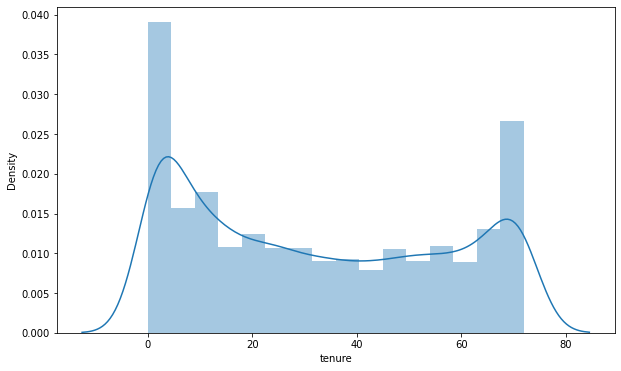

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["tenure"])

In [ ]:
df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


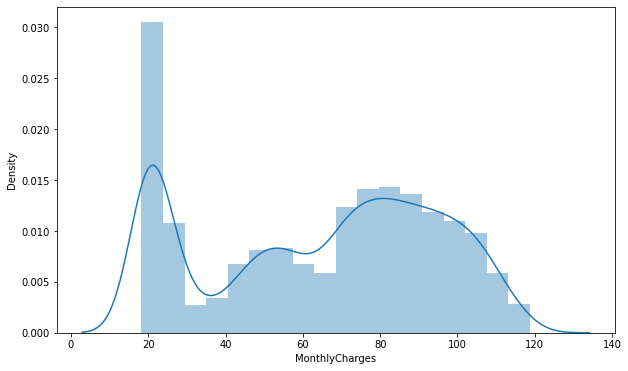

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df["MonthlyCharges"])

In [ ]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
No,37.569965,61.265124
Yes,17.979133,74.441332
